<a href="https://colab.research.google.com/github/alzimna/Portfolio/blob/main/Notebook_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Overview**

Pada akhir tahun 2023, hubungan antara Palestina dan Israel memanas akibat penyerangan Israel di Gaza, Palestina. Penyerangan ini tidak hanya berdampak pada rakyat Palestina saja namun juga memberikan bekas luka kepada rakyat muslim di seluruh dunia. Hal ini memicu perlawanan dari seluruh negara muslim termasuk Indonesia sendiri.

Di Indonesia, santer terdengar pernyataan boikot terhadap produk yang diduga menyalurkan dana kepada Israel. Setelah kami lakukan investigasi di Twitter, perusahaan seperti Unilever dan KHC menjadi topik perbincangan teratas.

Projek ini merupakan projek yang dilakukan oleh saya dan 3 orang teman saya. Tujuan dari produk ini adalah menginvestigasi efek dari boikot melalui analisis sentimen di Twitter pada kenaikan harga sahan dari Unilever (UNVR) lau membandingkannya dengan perusahaan yang terkena boikot namun tidak menjadi trending topic di twitter seperti KHC.

# **Project Method**
Berikut ini langkah-langkah yang dilakukan pada projek kali ini.

1. Scrapping tweet dengan kata kunci "UNVR", "Unilever", "boikot unilever".
2. Data preprocessing seperti
  * Menghapus duplikat
  * Mengubah format tanggal
  * Menghilangkan simbol khusus seperti \r, \n, ", url, dan byte
  * Mengubah menjadi lower case
  * Menghapus simbol dan tanda baca
  * Menormalisasi kata
  * Menghapus kata tidak bermakna
  * Menghapus imbuhan
  * Tokenize data
3. Analisis data eksploratif
4. Mengambil data saham UNVR dan KHC dari yahoo finance
5. Melakukan analisis sentimen pada tiap tweet
6. Mengklasifikasikan hari berdasarkan kejadian Naik/Turunnya harga saham UNVR
7. Melakukan klasifikasi pada data yang dilengkapi polarity dan tidak untuk dibandingkan akurasinya. Model yang dipakai antara lain Regresi Logistik, Linear Discriminant Analysis (LDA), KNN, dan SVM.

Kesimpulan yang dapat diperoleh dari projek ini adalah **Polarity akan menaikkan akurasi model jika dibandingkan dengan data tanpa polaritas. Artinya analisis sentimen dapat membantu untuk menaikkan akurasi model biasa untuk mengklasifikasian Naik/Turunnya harga saham**




# **Code Snippet**

In [1]:
# Import Libraries

# For EDA
import pandas as pd
import numpy as np
import re
import missingno as msno

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import nltk
import time
from tqdm import tqdm

#For Pre-Processing
import torch
import torchvision
import random
import os

import plotly.express as px

import nltk
from sklearn.feature_selection import chi2
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
nltk.download("punkt_tab")
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('omw-1.4')
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
!pip install contractions
import contractions
import re
import string

from textblob import TextBlob
from IPython.display import clear_output
!pip install googletrans
from googletrans import Translator
translator = Translator()

import warnings
warnings.filterwarnings("ignore")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.4 MB/s eta 0:00:00


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 8.7 MB/s eta 0:00:00


Data berikut ini merupakan hasil scrapping tweet dengan kata kunci "UNVR", "Unilever", dan "boikot unilever". Ketiga data tersebut disatukan untuk dilakukan preprocessing.

In [2]:
url = {}
url[1] = "https://github.com/alzimna/Portfolio/raw/refs/heads/main/Stock%20Price%20Prediction%20with%20Sentiment%20Analysis/data/Data_UNVR.xlsx"
url[2] = 'https://github.com/alzimna/Portfolio/raw/refs/heads/main/Stock%20Price%20Prediction%20with%20Sentiment%20Analysis/data/Unilever.xlsx'
url[3] = 'https://github.com/alzimna/Portfolio/blob/main/Stock%20Price%20Prediction%20with%20Sentiment%20Analysis/data/boikot_unilever.xlsx'

df = pd.DataFrame()
for i in range(1,3) :
  temp = pd.read_excel(url[i])
  df = pd.concat([df,temp],axis = 0)

data = df[["created_at","username","tweet_url","full_text"]]
data = data.rename(columns = {
    "created_at" : "Tanggal",
    "tweet_url" : "Link",
    "full_text" : "Konten"
})

data.reset_index(inplace = True,drop = True)
data.head(20)

,Tanggal,username,Link,Konten
0,Wed Dec 06 22:34:21 +0000 2023,ataritafaran,https://twitter.com/ataritafaran/status/173252...,@rasyidrobbani @anang_kur @rykarlsen Kalau ord...
1,Wed Dec 06 22:04:00 +0000 2023,nooptionmood,https://twitter.com/nooptionmood/status/173252...,@rykarlsen Sepupu Di unvr infonya masih stabil...
2,Wed Dec 06 16:07:27 +0000 2023,rnamidubx,https://twitter.com/rnamidubx/status/173243157...,@rykarlsen Pt kantor sy ga kena boikot dan ga ...
3,Wed Dec 06 00:35:52 +0000 2023,doktermarket,https://twitter.com/doktermarket/status/173219...,Pagi. semalam bursa AS ditutup bervariasi. Dow...
4,Tue Dec 05 23:23:47 +0000 2023,a37723_fauzan,https://twitter.com/a37723_fauzan/status/17321...,melihat adanya kenaikan yang stabil dalam bebe...
5,Tue Dec 05 05:41:08 +0000 2023,Bisniscom,https://twitter.com/Bisniscom/status/173191156...,"4 Direksi Unilever Indonesia (UNVR) Mundur, Be..."
6,Tue Dec 05 05:37:10 +0000 2023,KATADATAcoid,https://twitter.com/KATADATAcoid/status/173191...,"IHSG Sesi I Turun 0,4%, Saham UNVR hingga GOTO..."
7,Mon Dec 04 23:50:11 +0000 2023,InvestorID,https://twitter.com/InvestorID/status/17318232...,MNC Sekuritas memprediksi IHSG hari ini terkor...
8,Mon Dec 04 23:41:04 +0000 2023,Bisniscom,https://twitter.com/Bisniscom/status/173182094...,"IHSG Hari Ini Menuju 7.130, Cermati Saham BBCA..."
9,Mon Dec 04 09:06:49 +0000 2023,Iilasikuta,https://twitter.com/Iilasikuta/status/17316009...,@parxhanbin @Nakyunga IYAAA!! KENAPA UNVR


# **Data Preprocessing**

# Menghapus duplikat

In [3]:
# Pengecekan data duplikasi
print("data duplikat ada :",data.duplicated().sum())

data = data.drop_duplicates()

# Pengecekan data duplikasi kedya
print("data duplikat ada :", data.duplicated().sum())

#Menghapus baris yang memuat na
data = data.dropna()

data.info()

data duplikat ada : 79
data duplikat ada : 0
<class 'pandas.core.frame.DataFrame'>
Index: 6213 entries, 0 to 6293
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Tanggal   6213 non-null   object
 1   username  6213 non-null   object
 2   Link      6213 non-null   object
 3   Konten    6213 non-null   object
dtypes: object(4)
memory usage: 242.7+ KB


# Mengubah format tanggal

In [4]:
from datetime import datetime
temp = []
for i in range(data.shape[0]) :
  cek = data.iloc[i]["Tanggal"]
  s = cek[8:10]+" "+cek[4:7]+" "+cek[-4:]
  s = datetime.strptime(s, "%d %b %Y")
  temp.append(s)
data["Tanggal"] = temp

data = data.sort_values(by='Tanggal')
data.reset_index(inplace = True,drop = True)
data.head()

,Tanggal,username,Link,Konten
0,2023-10-07,ijcancer_,https://twitter.com/ijcancer_/status/171048510...,"Mantan presbem, kerja di unilever, keterima di..."
1,2023-10-07,MakassarFess,https://twitter.com/MakassarFess/status/171048...,Tabe info info yg bingung mau kemana weekendny...
2,2023-10-07,PurazaAnalytics,https://twitter.com/PurazaAnalytics/status/171...,Sebesar besar company macam Unilever pun guna ...
3,2023-10-07,selembutbolu,https://twitter.com/selembutbolu/status/171070...,@pengwinningg Mangat unilever ðŸ¤­ðŸ’‹ðŸ’‹ðŸ’‹
4,2023-10-07,ncaaidnzz,https://twitter.com/ncaaidnzz/status/171069358...,@UPIfess unilever AAMIINN PLEASEEEE selain dek...


# Menghilangkan simbol khusus seperti \r, \n, ", url, dan byte

In [5]:
# TEXT PRE-PROCESSING
# TAHAP 1
# Menghilangkan simbol khusus seperti \r, \n, ", url, dan byte
def cleaning(data):
  data['Konten_Parsed_1'] = data['Konten'].str.replace("\\\\r",
  " ")
  data['Konten_Parsed_1'] = data['Konten_Parsed_1'].str.replace("\\\\n", " ")
  data['Konten_Parsed_1'] = data['Konten_Parsed_1'].str.replace("\n", " ")
  data['Konten_Parsed_1'] = data['Konten_Parsed_1'].str.replace("\r", " ")
  data['Konten_Parsed_1'] = data['Konten_Parsed_1'].str.replace("&amp", " ")
  data['Konten_Parsed_1'] = data['Konten_Parsed_1'].str.replace("&gt", " ")
  data['Konten_Parsed_1'] = data['Konten_Parsed_1'].str.replace("&lt", " ")
  data['Konten_Parsed_1'] = data['Konten_Parsed_1'].str.replace(" ", " ")
  data['Konten_Parsed_1']= data['Konten_Parsed_1'].str.replace(r'''(?i)\b((?:https|http?:/
  /|www\d{0,3}[.]|[a-z0-9.\-]+[.][az]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:
  \(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”
  ‘’]))''', " ")
  data['Konten_Parsed_1'] = data['Konten_Parsed_1'].str.replace('"', '')
  data['Konten_Parsed_1'] = data['Konten_Parsed_1'].str.replace("\\\\x[a-zA-z0-9][a-zA-z0-9]","")
  return data

data = cleaning(data)
print("Sampel data sebelum preprocess :\n",data["Konten"][0])
print("Hasil setelah tahap 1 :\n",data["Konten_Parsed_1"][0])

Sampel data sebelum preprocess :
 Mantan presbem, kerja di unilever, keterima di pbb gadiambil karena pengennya di unicef,  mau nyoba ke Freeport. Disukai temen kantor, cewek UI, pinter, volunteer luar negeri, cantik lagi. Sempurna banget gak tu idup, lupa nanya linkedinnya ðŸ¥², jaringan keputus
Hasil setelah tahap 1 :
 Mantan presbem, kerja di unilever, keterima di pbb gadiambil karena pengennya di unicef,  mau nyoba ke Freeport. Disukai temen kantor, cewek UI, pinter, volunteer luar negeri, cantik lagi. Sempurna banget gak tu idup, lupa nanya linkedinnya ðŸ¥², jaringan keputus


# Mengubah menjadi lower case

In [6]:
#TAHAP 2
# Mengubah menjadi lower case
def lowerCase(data):
    data['Konten_Parsed_2'] = data['Konten_Parsed_1'].str.lower()
    return data
data = lowerCase(data)
print("Sampel data sebelum preprocess :\n",data["Konten"][0])
print("Hasil setelah tahap 2 :\n",data["Konten_Parsed_2"][0])

Sampel data sebelum preprocess :
 Mantan presbem, kerja di unilever, keterima di pbb gadiambil karena pengennya di unicef,  mau nyoba ke Freeport. Disukai temen kantor, cewek UI, pinter, volunteer luar negeri, cantik lagi. Sempurna banget gak tu idup, lupa nanya linkedinnya ðŸ¥², jaringan keputus
Hasil setelah tahap 2 :
 mantan presbem, kerja di unilever, keterima di pbb gadiambil karena pengennya di unicef,  mau nyoba ke freeport. disukai temen kantor, cewek ui, pinter, volunteer luar negeri, cantik lagi. sempurna banget gak tu idup, lupa nanya linkedinnya ðÿ¥², jaringan keputus


# Menghapus simbol dan tanda baca

In [7]:
#TAHAP 3
#Menghapus simbol dan tanda baca
def removePunct(data):
    data['Konten_Parsed_3'] = data['Konten_Parsed_2']
    data['Konten_Parsed_3'] = data['Konten_Parsed_3'].str.replace("'s","")
    data['Konten_Parsed_3'] = data['Konten_Parsed_3'].str.replace('[^a-zA-Z0-9]+',' ')
    return data
data = removePunct(data)
print("Sampel data sebelum preprocess :\n",data["Konten"][0])
print("Hasil setelah tahap 3 :\n",data["Konten_Parsed_3"][0])

Sampel data sebelum preprocess :
 Mantan presbem, kerja di unilever, keterima di pbb gadiambil karena pengennya di unicef,  mau nyoba ke Freeport. Disukai temen kantor, cewek UI, pinter, volunteer luar negeri, cantik lagi. Sempurna banget gak tu idup, lupa nanya linkedinnya ðŸ¥², jaringan keputus
Hasil setelah tahap 3 :
 mantan presbem, kerja di unilever, keterima di pbb gadiambil karena pengennya di unicef,  mau nyoba ke freeport. disukai temen kantor, cewek ui, pinter, volunteer luar negeri, cantik lagi. sempurna banget gak tu idup, lupa nanya linkedinnya ðÿ¥², jaringan keputus


# Menormalisasi kata

In [8]:
#TAHAP 4
#Normalisasi setiap kata
url1 = 'https://github.com/nasalsabila/kamus-alay/raw/master/colloquial-indonesian-lexicon.csv'
kamus1 = pd.read_csv(url1).iloc[:,:2]
kamus1 = kamus1.rename(columns={"slang": "non_standar","formal" : "standar"})

#Normalisasi tahap 1
def normalize_1(text):
    nonstdword = kamus1['non_standar'].values.tolist()
    stdword = kamus1['standar'].values.tolist()
    text = text.split(" ")
    for i in range(len(text)):
      if text[i] in nonstdword:
        index = nonstdword.index(text[i])
        text[i] = stdword[index]
    return ' '.join(map(str, text))

data['Konten_Parsed_4'] = data['Konten_Parsed_3']
data['Konten_Parsed_4'] = data['Konten_Parsed_4'].map(lambda com : normalize_1(com))

# Menghilangkan angka
data['Konten_Parsed_4'] = data['Konten_Parsed_4'].str.replace('[^a-zA-Z]+',' ')

# Menghapus Multiple Whitespace
def remove_multiple_whitespace(text):
  text = re.sub('\s+',' ',text)
  return text.translate(str.maketrans("","",string.punctuation))

data['Konten_Parsed_4'] = data['Konten_Parsed_4'].apply(remove_multiple_whitespace)
print("Sampel data sebelum preprocess :\n",data["Konten"][2])
print("Hasil setelah tahap 4 :\n",data["Konten_Parsed_4"][2])

Sampel data sebelum preprocess :
 Sebesar besar company macam Unilever pun guna Power BI untuk build reporting dashboard untuk semua stakeholders.  Kalau google Unilever+Power BI developer pun banyak job vacancies diorng tengah promote.  Really is an enticing scenario for all BI developers. https://t.co/VDOJenEg7H
Hasil setelah tahap 4 :
 sebesar besar company macam unilever pun guna power bi untuk build reporting dashboard untuk semua stakeholders kalau google unileverpower bi developer pun banyak job vacancies diorng tengah promote really is an enticing scenario for all bi developers httpstcovdojeneg7h


## Menghapus kata tidak bermakna

In [9]:
# TAHAP 5
# Menghilangkan kata tidak bermakna (stopwords)
import base64
import requests
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopwords_sastrawi = factory.get_stop_words()

master = "https://github.com/masdevid/ID-Stopwords/raw/master/id.stopwords.02.01.2016.txt"
req = requests.get(master)
req = req.text

meaningless = req.split("\n")
stopwords_nltk = list(stopwords.words('indonesian')) + list(stopwords.words('english'))
more_stopword = ['gue',"beliau","doang","ha","guia","engkau","ku","sih","nya",
                 "kayak","tau","pikir","bikin","kali","gara","nama",
                 "bilang","tinggal","tanyakanrl","deh","iya","biar","pa"]
meaningless = meaningless + stopwords_nltk + stopwords_sastrawi+more_stopword

def delete_meaningless(text) :
  result = []
  text = text.split(" ")
  for i in range(len(text)):
    if text[i] not in meaningless:
      result.append(text[i])
  return ' '.join(map(str,result))
data['Konten_Parsed_5'] = data['Konten_Parsed_4'].map(lambda com : delete_meaningless(com))
print("Sampel data sebelum preprocess :\n",data["Konten"][2])
print("Hasil setelah tahap 5 :\n",data["Konten_Parsed_5"][2])

Sampel data sebelum preprocess :
 Sebesar besar company macam Unilever pun guna Power BI untuk build reporting dashboard untuk semua stakeholders.  Kalau google Unilever+Power BI developer pun banyak job vacancies diorng tengah promote.  Really is an enticing scenario for all BI developers. https://t.co/VDOJenEg7H
Hasil setelah tahap 5 :
 company unilever power bi build reporting dashboard stakeholders google unileverpower bi developer job vacancies diorng promote really enticing scenario bi developers httpstcovdojeneg7h


# Menghilangkan Imbuhan (stemming)
Karena data terlalu besar nantinya akan membuat proses stemming menjadi sangat lama, sehingga kami membaginya menjadi 4 bagian dan melakukan stemming secara terpisah. Setelah mendapatkan hasil stemming, data disatukan kembali seperti pada sintaks berikut ini.

In [10]:
# TAHAP 6 Lemmatizating dan Stemming
# Menghilangkan imbuhan (stemming)
wn= nltk.WordNetLemmatizer()
def lemmatization(text):
  result = []
  text = text.split(" ")
  for word in text :
    result.append(wn.lemmatize(word))
  return ' '.join(map(str,result))

# Buat kolom tambahan untuk data description yang telah dilemmatization
data['Konten_Parsed_6'] = data['Konten_Parsed_5'].apply(lemmatization)

index_to_drop = []
for i in range(data.shape[0]) :
  text = data["Konten_Parsed_6"][i]
  text = text.split(" ")
  if len(text)==1 :
    index_to_drop.append(i)
data = data.drop(index_to_drop).reset_index(drop = True)

In [11]:
# from IPython.display import clear_output

# url = 'https://github.com/alzimna/Pemodelan_UAS/raw/main/data_sebelum_stem.xlsx'
# a = 4500
# b = 6208
# bagianku = pd.read_excel(url)[a:b]
# factory = StemmerFactory()
# stemmer = factory.create_stemmer()
# def stemming(text):
#   result = []
#   text = text.split(" ")
#   for word in text :
#     stem_text = stemmer.stem(word)
#     result.append(stem_text)
#   result = ' '.join(map(str,result))
#   return result

# stem = []
# n = bagianku.shape[0]
# for i in range(n) :
#   stem.append(stemming(bagianku.iloc[i]["Konten_Parsed_6"]))
#   print(i,"/",n)
#   clear_output(wait=True)

# # Buat kolom tambahan untuk data description yang telah dilemmatization
# bagianku['Konten_Parsed_6'] = stem

# bagianku.to_excel("bagianku_setelah_stem.xlsx",index = None)

In [12]:
url = ["https://github.com/alzimna/Portfolio/raw/refs/heads/main/Stock%20Price%20Prediction%20with%20Sentiment%20Analysis/data/bagian_rara.xlsx",
       "https://github.com/alzimna/Portfolio/raw/refs/heads/main/Stock%20Price%20Prediction%20with%20Sentiment%20Analysis/data/bagian_maya.xlsx",
       "https://github.com/alzimna/Portfolio/raw/refs/heads/main/Stock%20Price%20Prediction%20with%20Sentiment%20Analysis/data/bagian_raisa.xlsx",
       "https://github.com/alzimna/Portfolio/raw/refs/heads/main/Stock%20Price%20Prediction%20with%20Sentiment%20Analysis/data/bagian_alzim.xlsx"

]
data = pd.DataFrame()
for i in range(4) :
  temp = pd.read_excel(url[i])
  data = pd.concat([data,temp],axis = 0)
data.reset_index(inplace = True,drop = True)
print("Sampel data sebelum preprocess :\n",data.iloc[2]["Konten"])
print("Hasil setelah tahap 6 :\n",data.iloc[2]["Konten_Parsed_6"])

Sampel data sebelum preprocess :
 Sebesar besar company macam Unilever pun guna Power BI untuk build reporting dashboard untuk semua stakeholders.  Kalau google Unilever+Power BI developer pun banyak job vacancies diorng tengah promote.  Really is an enticing scenario for all BI developers. https://t.co/VDOJenEg7H
Hasil setelah tahap 6 :
 company unilever power bi build reporting dashboard stakeholder google unilever power bi developer job vacancy diorng promosi really enticing scenario bi developer 


In [13]:
#Menghapus stopword setelah distemming
factory = StopWordRemoverFactory()
stopwords_sastrawi = factory.get_stop_words()

master = "https://github.com/masdevid/ID-Stopwords/raw/master/id.stopwords.02.01.2016.txt"
req = requests.get(master)
req = req.text

meaningless = req.split("\n")
stopwords_nltk = list(stopwords.words('indonesian')) + list(stopwords.words('english'))
more_stopword = ['gue',"beliau","doang","ha","guia","engkau","ku","sih","nya",
                 "kayak","tau","pikir","bikin","kali","gara","nama",
                 "bilang","tinggal","tanyakanrl","deh","iya","biar","pa",
                 "cv","p","wa","jasa","jokitugas","cover","itv","hm","jasacvats","kak","tanyarlfes",
                 "surat","lamar","republikaonline","cek","letter","warpin","convomf"]
meaningless = meaningless + stopwords_nltk + stopwords_sastrawi+more_stopword

data['Konten_Parsed_6'] = data['Konten_Parsed_6'].apply(delete_meaningless)

# Tokenize Data

In [14]:
# Tokenisasi
def tokenize(text):
  token = nltk.word_tokenize(text)
  return token
data["tokenize"] = data["Konten_Parsed_6"].apply(tokenize)

In [15]:
# Fixing Data
data = data.drop(['Konten_Parsed_1','Konten_Parsed_2','Konten_Parsed_3','Konten_Parsed_4',
           'Konten_Parsed_5'],axis = 1)
data = data.rename(columns={'Konten_Parsed_6' : 'Konten_Parsed'})

print("Sampel data sebelum preprocess :\n",data.iloc[2]["Konten"])
print("Hasil setelah tahap 6 :\n",data.iloc[2]["Konten_Parsed"])

Sampel data sebelum preprocess :
 Sebesar besar company macam Unilever pun guna Power BI untuk build reporting dashboard untuk semua stakeholders.  Kalau google Unilever+Power BI developer pun banyak job vacancies diorng tengah promote.  Really is an enticing scenario for all BI developers. https://t.co/VDOJenEg7H
Hasil setelah tahap 6 :
 company unilever power bi build reporting dashboard stakeholder google unilever power bi developer job vacancy diorng promosi really enticing scenario bi developer 


In [16]:
data.head(20)

,Tanggal,username,Link,Konten,Konten_Parsed,tokenize
0,2023-10-07,ijcancer_,https://twitter.com/ijcancer_/status/171048510...,"Mantan presbem, kerja di unilever, keterima di...",mantan presbem kerja unilever terima pbb gadia...,"[mantan, presbem, kerja, unilever, terima, pbb..."
1,2023-10-07,MakassarFess,https://twitter.com/MakassarFess/status/171048...,Tabe info info yg bingung mau kemana weekendny...,tabe info info bingung weekendnya event seru g...,"[tabe, info, info, bingung, weekendnya, event,..."
2,2023-10-07,PurazaAnalytics,https://twitter.com/PurazaAnalytics/status/171...,Sebesar besar company macam Unilever pun guna ...,company unilever power bi build reporting dash...,"[company, unilever, power, bi, build, reportin..."
3,2023-10-07,selembutbolu,https://twitter.com/selembutbolu/status/171070...,@pengwinningg Mangat unilever ðŸ¤­ðŸ’‹ðŸ’‹ðŸ’‹,pengwinningg mangat unilever,"[pengwinningg, mangat, unilever]"
4,2023-10-07,ncaaidnzz,https://twitter.com/ncaaidnzz/status/171069358...,@UPIfess unilever AAMIINN PLEASEEEE selain dek...,upifess unilever amin pleaseeee rumah banget ...,"[upifess, unilever, amin, pleaseeee, rumah, ba..."
5,2023-10-07,ziippaaa,https://twitter.com/ziippaaa/status/1710685378...,"@treasuremenfess +collab sm unilever, cover je...",treasuremenfess collab unilever jeongwoo view...,"[treasuremenfess, collab, unilever, jeongwoo, ..."
6,2023-10-07,jscize,https://twitter.com/jscize/status/171067186503...,si ocid lagi apply mt unilever biar deket ruma...,ocid apply mt unilever rumah doa moga masuk,"[ocid, apply, mt, unilever, rumah, doa, moga, ..."
7,2023-10-07,gabna_wd,https://twitter.com/gabna_wd/status/1710669341...,@Widino Kirain ini produk dari UMKM lokal. Aku...,widino produk usaha mikro lokal berani banget...,"[widino, produk, usaha, mikro, lokal, berani, ..."
8,2023-10-07,tesssaate,https://twitter.com/tesssaate/status/171065802...,"the obrolan lu skrg semester brp"" to ""lu kalo ...",obrol semester magang cari kerja masuk unilever,"[obrol, semester, magang, cari, kerja, masuk, ..."
9,2023-10-07,PhoenixWiccan14,https://twitter.com/PhoenixWiccan14/status/171...,"Iri sama fyp isinya bilang iseng"" ngelamar kek...",iri fyp isi iseng ngelamar cabin crew unilever...,"[iri, fyp, isi, iseng, ngelamar, cabin, crew, ..."


In [17]:
# ANALISIS DATA EKSPLORATIF
data_eda = data.copy()
data_eda.info()
data_eda = pd.DataFrame(data_eda)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6207 entries, 0 to 6206
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Tanggal        6207 non-null   datetime64[ns]
 1   username       6207 non-null   object        
 2   Link           6207 non-null   object        
 3   Konten         6207 non-null   object        
 4   Konten_Parsed  6207 non-null   object        
 5   tokenize       6207 non-null   object        
dtypes: datetime64[ns](1), object(5)
memory usage: 291.1+ KB


In [18]:
# Membuat grafik untuk 10 kata teratas yang paling banyak muncul di seluruh korpus
# Gabungkan teks yang telah diproses sebelumnya dari semua isi berita
text = ' '.join(data_eda['Konten_Parsed'])

# Tokenisasi
words = text.split()

# Hitung frekuensi setiap kata
word_freq = pd.Series(words).value_counts()

# Pilih 10 kata teratas yang paling sering
top_words = word_freq.head(50)

#print
print(top_words)

unilever     6170
produk       2591
boikot       1254
indonesia     946
pakai         785
israel        724
beli          643
unvr          560
kerja         501
usaha         473
saham         457
banget        444
orang         422
terima        405
ganti         390
merek         378
contoh        359
shopee        345
mc            328
instagram     326
pro           311
donalds       309
grab          306
tokped        305
tembus        304
open          304
testimoni     302
gojek         301
porto         299
friendly      299
kreatif       299
dukung        282
nestle        271
sayap         269
jual          261
harga         255
palestina     246
chicken       243
danone        236
turun         231
masuk         223
wkwk          223
rumah         219
barang        218
sabun         199
lokal         193
cari          178
diskon        177
fried         170
convomfs      170
Name: count, dtype: int64


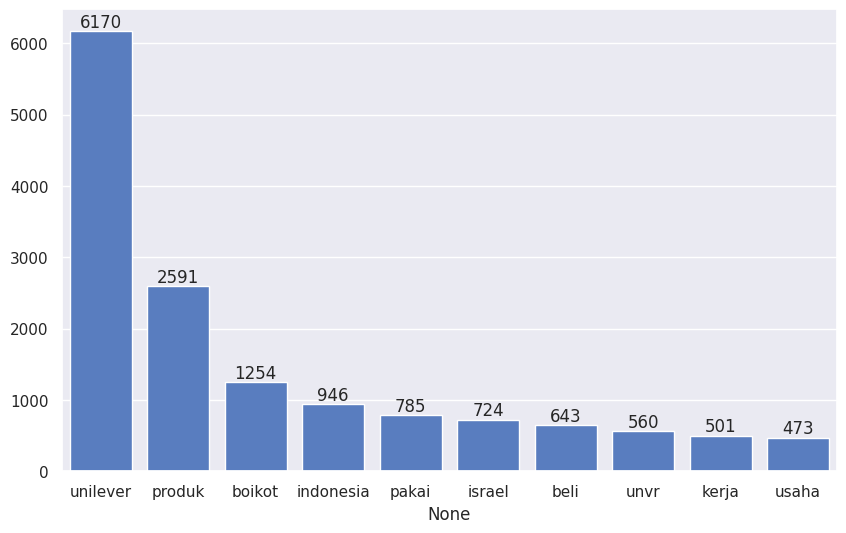

In [19]:
sns.set_theme(palette="muted")
fig = plt.figure(figsize = (10,6))
ax = sns.barplot(x = top_words.index[:10], y = top_words.values[:10])
# Adding labels for every bar
for bar, label in zip(ax.patches, top_words.values):
    ax.annotate(label, (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='bottom')

In [20]:
# Perbandingan jumlah kata sebelum dan sesudah text preprocessing
text1 = ' '.join(data['Konten'])
print('Total kata sebelum pre-processing adalah sebanyak {} kata'.format(len(text1)))
text2 = ' '.join(data['Konten_Parsed'])
print('Total kata setelah pre-processing adalah sebanyak {} kata'.format(len(text2)))

Total kata sebelum pre-processing adalah sebanyak 959092 kata
Total kata setelah pre-processing adalah sebanyak 535635 kata


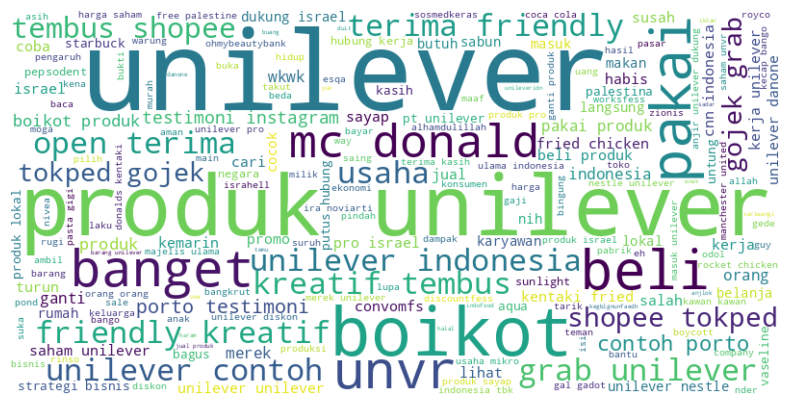

In [21]:
# WORD CLOUDS
text = ' '.join(data['Konten_Parsed'])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('foo.png')
plt.show()

# Loading data UNVR dan KHC

In [22]:
import pandas as pd
from datetime import datetime, timedelta

# Define the start and end dates
start_date = datetime(2023, 8, 7)
end_date = datetime(2023, 12, 7)

# Define the interval between datetime objects
interval = timedelta(days=1)

# Create a list of datetime objects within the specified range
tanggal = [start_date + i * interval for i in range((end_date - start_date).days + 1)]

In [23]:
url = "https://github.com/alzimna/Portfolio/raw/refs/heads/main/Stock%20Price%20Prediction%20with%20Sentiment%20Analysis/data/Saham%20KHC.xlsx"
khc = pd.read_excel(url)
khc_full = {}
for hari in tanggal :
  if hari in list(khc["Date"]) :
    khc_full[hari] = float(khc[khc["Date"]==hari]["Adj Close"])
  else :
    khc_full[hari] = 0
for hari in khc_full.keys() :
  if khc_full[hari] == 0 :
    if khc_full[hari+interval] != 0:
      khc_full[hari] = 1/2*(khc_full[hari-interval]+khc_full[hari+interval])
    else :
      khc_full[hari] = 1/3*(khc_full[hari-interval]+2*khc_full[hari+2*interval])
khc = pd.DataFrame({
    "Date" : khc_full.keys(),
    "Adj" : khc_full.values()
})
khc

,Date,Adj
0,2023-08-07,34.189854
1,2023-08-08,33.662354
2,2023-08-09,33.720963
3,2023-08-10,33.593971
4,2023-08-11,33.750271
...,...,...
118,2023-12-03,35.770000
119,2023-12-04,35.820000
120,2023-12-05,35.840000
121,2023-12-06,36.200001


In [24]:
Label = []
n = khc.shape[0]
for i in range(1,n) :
  if khc.iloc[i,1] >= khc.iloc[i-1,1] :
    Label.append("Naik")
  else :
    Label.append("Turun")
khc.drop(0,inplace = True)
khc["Label"] = Label

In [25]:
bound = datetime(2023, 10, 7)
n = khc.shape[0]

n_b = 0
n_a = 0
t_b = 0
t_a = 0
for i in range(n) :
  if khc.iloc[i,0] < bound :
    if khc.iloc[i,2] == "Naik" :
      n_b += 1
    else :
      t_b +=1
  else :
    if khc.iloc[i,2] == "Naik" :
      n_a += 1
    else :
      t_a +=1
df = pd.DataFrame({
    "Naik" : [n_b,n_a],
    "Turun" : [t_b,t_a]
}, index = ["Sebelum boikot","Sesudah boikot"])
df

,Naik,Turun
Sebelum boikot,25,35
Sesudah boikot,40,22


In [26]:
url = "https://github.com/alzimna/Portfolio/raw/refs/heads/main/Stock%20Price%20Prediction%20with%20Sentiment%20Analysis/data/UNVR.JK.xlsx"
unvr = pd.read_excel(url)
unvr_full = {}
for hari in tanggal :
  if hari in list(unvr["Date"]) :
    unvr_full[hari] = float(unvr[unvr["Date"]==hari]["Adj Close"])
  else :
    unvr_full[hari] = 0
for hari in unvr_full.keys() :
  if unvr_full[hari] == 0 :
    if unvr_full[hari+interval] != 0:
      unvr_full[hari] = 1/2*(unvr_full[hari-interval]+unvr_full[hari+interval])
    else :
      unvr_full[hari] = 1/3*(unvr_full[hari-interval]+2*unvr_full[hari+2*interval])
unvr = pd.DataFrame({
    "Date" : unvr_full.keys(),
    "Adj" : unvr_full.values()
})
unvr

,Date,Adj
0,2023-08-07,3589.827393
1,2023-08-08,3618.777588
2,2023-08-09,3589.827393
3,2023-08-10,3551.227295
4,2023-08-11,3570.527344
...,...,...
118,2023-12-03,3502.976562
119,2023-12-04,3502.976562
120,2023-12-05,3555.025635
121,2023-12-06,3447.000000


In [27]:
Label = []
n = unvr.shape[0]
for i in range(1,n) :
  if unvr.iloc[i,1] >= unvr.iloc[i-1,1] :
    Label.append("Naik")
  else :
    Label.append("Turun")
unvr.drop(0,inplace = True)
unvr["Label"] = Label

In [28]:
unvr

,Date,Adj,Label
1,2023-08-08,3618.777588,Naik
2,2023-08-09,3589.827393,Turun
3,2023-08-10,3551.227295,Turun
4,2023-08-11,3570.527344,Naik
5,2023-08-12,3589.827474,Naik
...,...,...,...
118,2023-12-03,3502.976562,Naik
119,2023-12-04,3502.976562,Naik
120,2023-12-05,3555.025635,Naik
121,2023-12-06,3447.000000,Turun


In [29]:
bound = datetime(2023, 10, 7)
n = unvr.shape[0]

n_b = 0
n_a = 0
t_b = 0
t_a = 0
for i in range(n) :
  if unvr.iloc[i,0] < bound :
    if unvr.iloc[i,2] == "Naik" :
      n_b += 1
    else :
      t_b +=1
  else :
    if unvr.iloc[i,2] == "Naik" :
      n_a += 1
    else :
      t_a +=1
df = pd.DataFrame({
    "Naik" : [n_b,n_a],
    "Turun" : [t_b,t_a]
}, index = ["Sebelum boikot","Sesudah boikot"])
df

,Naik,Turun
Sebelum boikot,29,31
Sesudah boikot,31,31


# Analisis Sentimen Setiap Tweet
Perhatikan data setelah setemming berikut ini

In [30]:
data.head(5)

,Tanggal,username,Link,Konten,Konten_Parsed,tokenize
0,2023-10-07,ijcancer_,https://twitter.com/ijcancer_/status/171048510...,"Mantan presbem, kerja di unilever, keterima di...",mantan presbem kerja unilever terima pbb gadia...,"[mantan, presbem, kerja, unilever, terima, pbb..."
1,2023-10-07,MakassarFess,https://twitter.com/MakassarFess/status/171048...,Tabe info info yg bingung mau kemana weekendny...,tabe info info bingung weekendnya event seru g...,"[tabe, info, info, bingung, weekendnya, event,..."
2,2023-10-07,PurazaAnalytics,https://twitter.com/PurazaAnalytics/status/171...,Sebesar besar company macam Unilever pun guna ...,company unilever power bi build reporting dash...,"[company, unilever, power, bi, build, reportin..."
3,2023-10-07,selembutbolu,https://twitter.com/selembutbolu/status/171070...,@pengwinningg Mangat unilever ðŸ¤­ðŸ’‹ðŸ’‹ðŸ’‹,pengwinningg mangat unilever,"[pengwinningg, mangat, unilever]"
4,2023-10-07,ncaaidnzz,https://twitter.com/ncaaidnzz/status/171069358...,@UPIfess unilever AAMIINN PLEASEEEE selain dek...,upifess unilever amin pleaseeee rumah banget ...,"[upifess, unilever, amin, pleaseeee, rumah, ba..."


Setiap tweet mempunyai tiga jenis tendensi, yaitu positif (nilai polarity positif), netral (nilai polarity 0), dan negatif (nilai polarity negatif). Langkah selanjutnya adalah mencari nilai polarity dari setiap tweet menggunakan package TextBlob. Untuk menggunakan TextBlob, tweet berbahasa Indonesia diterjemahkan kedalam bahasa inggris terlebih dahulu. Karena data terlalu besar, kami membaginya menjadi 4 bagian. Berikut ini diberikan contoh untuk mendapatkan nilai polarity setiap tweet.

In [31]:
bagianku = data[:100]
bagianku.reset_index(drop = True,inplace = True)
polarity = []
n = 100
cek = bagianku.iloc[1]["Konten_Parsed"]
translation = await translator.translate(cek,src = "id",dest='en')
text_indo = TextBlob(translation.text)
text_indo.sentiment
for i in range(n) :
  cek = bagianku.iloc[i]["Konten_Parsed"]
  translation = await translator.translate(cek,src = "id",dest='en')
  text_indo = TextBlob(translation.text)
  analysis = text_indo.sentiment
  polarity.append(analysis.polarity)
  print(i,"/",n)
  clear_output(wait=True)
bagianku["polarity"] = polarity
bagianku.head(10)

,Tanggal,username,Link,Konten,Konten_Parsed,tokenize,polarity
0,2023-10-07,ijcancer_,https://twitter.com/ijcancer_/status/171048510...,"Mantan presbem, kerja di unilever, keterima di...",mantan presbem kerja unilever terima pbb gadia...,"[mantan, presbem, kerja, unilever, terima, pbb...",0.144048
1,2023-10-07,MakassarFess,https://twitter.com/MakassarFess/status/171048...,Tabe info info yg bingung mau kemana weekendny...,tabe info info bingung weekendnya event seru g...,"[tabe, info, info, bingung, weekendnya, event,...",0.140000
2,2023-10-07,PurazaAnalytics,https://twitter.com/PurazaAnalytics/status/171...,Sebesar besar company macam Unilever pun guna ...,company unilever power bi build reporting dash...,"[company, unilever, power, bi, build, reportin...",0.200000
3,2023-10-07,selembutbolu,https://twitter.com/selembutbolu/status/171070...,@pengwinningg Mangat unilever ðŸ¤­ðŸ’‹ðŸ’‹ðŸ’‹,pengwinningg mangat unilever,"[pengwinningg, mangat, unilever]",0.200000
4,2023-10-07,ncaaidnzz,https://twitter.com/ncaaidnzz/status/171069358...,@UPIfess unilever AAMIINN PLEASEEEE selain dek...,upifess unilever amin pleaseeee rumah banget ...,"[upifess, unilever, amin, pleaseeee, rumah, ba...",0.000000
5,2023-10-07,ziippaaa,https://twitter.com/ziippaaa/status/1710685378...,"@treasuremenfess +collab sm unilever, cover je...",treasuremenfess collab unilever jeongwoo view...,"[treasuremenfess, collab, unilever, jeongwoo, ...",1.000000
6,2023-10-07,jscize,https://twitter.com/jscize/status/171067186503...,si ocid lagi apply mt unilever biar deket ruma...,ocid apply mt unilever rumah doa moga masuk,"[ocid, apply, mt, unilever, rumah, doa, moga, ...",0.000000
7,2023-10-07,gabna_wd,https://twitter.com/gabna_wd/status/1710669341...,@Widino Kirain ini produk dari UMKM lokal. Aku...,widino produk usaha mikro lokal berani banget...,"[widino, produk, usaha, mikro, lokal, berani, ...",0.385714
8,2023-10-07,tesssaate,https://twitter.com/tesssaate/status/171065802...,"the obrolan lu skrg semester brp"" to ""lu kalo ...",obrol semester magang cari kerja masuk unilever,"[obrol, semester, magang, cari, kerja, masuk, ...",0.000000
9,2023-10-07,PhoenixWiccan14,https://twitter.com/PhoenixWiccan14/status/171...,"Iri sama fyp isinya bilang iseng"" ngelamar kek...",iri fyp isi iseng ngelamar cabin crew unilever...,"[iri, fyp, isi, iseng, ngelamar, cabin, crew, ...",0.300000


In [32]:
url = [
    "https://github.com/alzimna/Portfolio/raw/refs/heads/main/Stock%20Price%20Prediction%20with%20Sentiment%20Analysis/data/bagian_rara_polarity.xlsx",
    "https://github.com/alzimna/Portfolio/raw/refs/heads/main/Stock%20Price%20Prediction%20with%20Sentiment%20Analysis/data/bagian_maya_polarity.xlsx",
    "https://github.com/alzimna/Portfolio/raw/refs/heads/main/Stock%20Price%20Prediction%20with%20Sentiment%20Analysis/data/bagian_raisa_polarity.xlsx",
    "https://github.com/alzimna/Portfolio/raw/refs/heads/main/Stock%20Price%20Prediction%20with%20Sentiment%20Analysis/data/bagian_alzim_polarity.xlsx"

]
data_polarity = pd.DataFrame()
for i in range(len(url)) :
  temp = pd.read_excel(url[i])
  data_polarity = pd.concat([data_polarity,temp],axis = 0)
data_polarity.reset_index(inplace = True,drop = True)
data_polarity

,Tanggal,username,Link,Konten,Konten_Parsed,tokenize,polarity
0,2023-10-07,ijcancer_,https://twitter.com/ijcancer_/status/171048510...,"Mantan presbem, kerja di unilever, keterima di...",mantan presbem kerja unilever terima pbb gadia...,"['mantan', 'presbem', 'kerja', 'unilever', 'te...",0.144048
1,2023-10-07,MakassarFess,https://twitter.com/MakassarFess/status/171048...,Tabe info info yg bingung mau kemana weekendny...,tabe info info bingung weekendnya event seru g...,"['tabe', 'info', 'info', 'bingung', 'weekendny...",0.140000
2,2023-10-07,PurazaAnalytics,https://twitter.com/PurazaAnalytics/status/171...,Sebesar besar company macam Unilever pun guna ...,company unilever power bi build reporting dash...,"['company', 'unilever', 'power', 'bi', 'build'...",0.200000
3,2023-10-07,selembutbolu,https://twitter.com/selembutbolu/status/171070...,@pengwinningg Mangat unilever ðŸ¤­ðŸ’‹ðŸ’‹ðŸ’‹,pengwinningg mangat unilever,"['pengwinningg', 'mangat', 'unilever']",0.200000
4,2023-10-07,ncaaidnzz,https://twitter.com/ncaaidnzz/status/171069358...,@UPIfess unilever AAMIINN PLEASEEEE selain dek...,upifess unilever amin pleaseeee rumah banget ...,"['upifess', 'unilever', 'amin', 'pleaseeee', '...",0.000000
...,...,...,...,...,...,...,...
6202,2023-12-07,Imanhazard23,https://twitter.com/Imanhazard23/status/173269...,@convomfs Boikot produk Unilever!!!,convomfs boikot produk unilever,"['convomfs', 'boikot', 'produk', 'unilever']",0.000000
6203,2023-12-07,seventeen_oppa,https://twitter.com/seventeen_oppa/status/1732...,ya kan UNILEVER ðŸ¤¦â€â™€ï¸,unilever,['unilever'],0.000000
6204,2023-12-07,dypvy,https://twitter.com/dypvy/status/1732691266520...,@gundamnyadia @convomfs Mana kak statementnya?...,gundamnyadia convomfs statementnya lihat ph h...,"['gundamnyadia', 'convomfs', 'statementnya', '...",0.000000
6205,2023-12-07,ChefLeebitt,https://twitter.com/ChefLeebitt/status/1732707...,@convomfs T-tapi induk pemodalnya yg sekarang ...,convomfs induk modal unilever produk indonesi...,"['convomfs', 'induk', 'modal', 'unilever', 'pr...",0.375000


In [33]:
def analyze_sentiment(polarity):
    if polarity < 0:
        return 'Negatif'
    elif polarity == 0:
        return 'Netral'
    else:
        return 'Positif'

# Add a new column 'Sentimen' to the DataFrame based on sentiment analysis
data_polarity['Sentimen'] = data_polarity['polarity'].apply(analyze_sentiment)

# Count the number of positive, negative, and neutral sentiments
sentiment_counts = data_polarity['Sentimen'].value_counts()

# Calculate the percentages
total_entries = len(data_polarity)
percentage_positif = (sentiment_counts.get('Positif', 0) / total_entries) * 100
percentage_negatif = (sentiment_counts.get('Negatif', 0) / total_entries) * 100
percentage_netral = (sentiment_counts.get('Netral', 0) / total_entries) * 100

print("Persentase sentimen:")
print(f"Positif: {percentage_positif:.2f}%")
print(f"Negatif: {percentage_negatif:.2f}%")
print(f"Netral: {percentage_netral:.2f}%")

Persentase sentimen:
Positif: 33.27%
Negatif: 17.27%
Netral: 49.46%


Setelah mendapatkan nilai polarity setiap tweet, dihitung rata-rata polarity dari tweet pada hari yang sama. Kemudian disatukan dengan data harga saham dan label kenaikannya.

In [34]:
p = data_polarity.groupby("Tanggal")["polarity"].mean().reset_index()
unvr = unvr[unvr["Date"] >= datetime(2023, 10, 7)].reset_index(drop = True)
unvr = pd.concat([unvr,p.iloc[:,1]],axis = 1)
unvr

,Date,Adj,Label,polarity
0,2023-10-07,3557.660563,Turun,0.181439
1,2023-10-08,3549.618856,Turun,0.038706
2,2023-10-09,3541.577148,Turun,0.114702
3,2023-10-10,3483.676758,Turun,0.149263
4,2023-10-11,3502.976562,Naik,0.081539
...,...,...,...,...
57,2023-12-03,3502.976562,Naik,0.020389
58,2023-12-04,3502.976562,Naik,0.115830
59,2023-12-05,3555.025635,Naik,0.036536
60,2023-12-06,3447.000000,Turun,0.093903


In [35]:
unvrp = unvr.drop(['Adj','Label'], axis = 1)
unvrp = pd.DataFrame(unvrp)
unvrp.head()

,Date,polarity
0,2023-10-07,0.181439
1,2023-10-08,0.038706
2,2023-10-09,0.114702
3,2023-10-10,0.149263
4,2023-10-11,0.081539


In [36]:
# Membuat kolom label
unvr['Label'] = unvr['Adj'].shift(-1)  # Shift harga satu baris ke atas
unvr['Label'] = unvr.apply(lambda row: 'Naik' if row['Label'] > row['Adj'] else 'Turun', axis=1).shift(+1)
unvr = unvr.drop(0).reset_index(drop = True)
unvr

,Date,Adj,Label,polarity
0,2023-10-08,3549.618856,Turun,0.038706
1,2023-10-09,3541.577148,Turun,0.114702
2,2023-10-10,3483.676758,Turun,0.149263
3,2023-10-11,3502.976562,Naik,0.081539
4,2023-10-12,3522.276855,Naik,0.028431
...,...,...,...,...
56,2023-12-03,3502.976562,Turun,0.020389
57,2023-12-04,3502.976562,Turun,0.115830
58,2023-12-05,3555.025635,Naik,0.036536
59,2023-12-06,3447.000000,Turun,0.093903


In [37]:
from sklearn.preprocessing import MinMaxScaler
# Initialize StandardScaler
scaler = MinMaxScaler()
unvr["Adj"] = scaler.fit_transform(unvr[["Adj"]])
unvr.head()

,Date,Adj,Label,polarity
0,2023-10-08,0.382051,Turun,0.038706
1,2023-10-09,0.369231,Turun,0.114702
2,2023-10-10,0.276923,Turun,0.149263
3,2023-10-11,0.307692,Naik,0.081539
4,2023-10-12,0.338461,Naik,0.028431


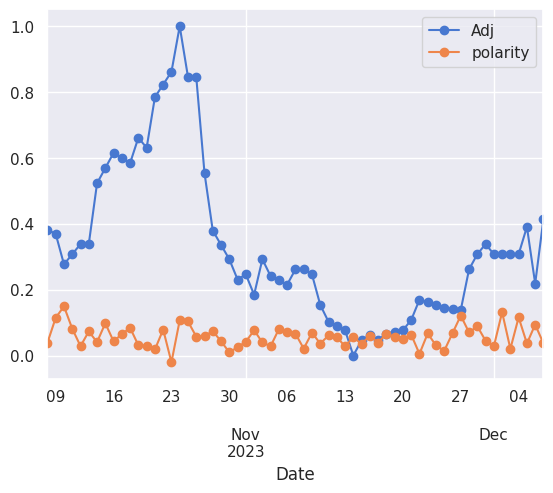

In [38]:
import matplotlib.pyplot as plt
unvr.plot(x='Date', y=['Adj', 'polarity'], kind='line', marker='o')
plt.show()

In [39]:
class_tanpa_polarity = unvr.iloc[3:,].copy().drop(["Adj","Date","polarity"],axis = 1).reset_index(drop = True)
n = class_tanpa_polarity.shape[0]
adj_d1 = []
adj_d2 = []
adj_d3 = []
for i in range(n) :
  adj_d1.append(unvr.iloc[i+2,1])

for i in range(n) :
  adj_d2.append(unvr.iloc[i+1,1])

for i in range(n) :
  adj_d3.append(unvr.iloc[i,1])
class_tanpa_polarity["adj_d1"] = adj_d1
class_tanpa_polarity["adj_d2"] = adj_d2
class_tanpa_polarity["adj_d3"] = adj_d3
class_tanpa_polarity

,Label,adj_d1,adj_d2,adj_d3
0,Naik,0.276923,0.369231,0.382051
1,Naik,0.307692,0.276923,0.369231
2,Turun,0.338461,0.307692,0.276923
3,Naik,0.338461,0.338461,0.307692
4,Naik,0.523077,0.338461,0.338461
5,Naik,0.569231,0.523077,0.338461
6,Turun,0.615385,0.569231,0.523077
7,Turun,0.600000,0.615385,0.569231
8,Naik,0.584615,0.600000,0.615385
9,Turun,0.661539,0.584615,0.600000


In [40]:
class_polarity = class_tanpa_polarity.copy()
n = class_polarity.shape[0]
polarity_d1 = []
polarity_d2 = []
polarity_d3 = []
for i in range(n) :
  polarity_d1.append(unvr.iloc[i+2,3])

for i in range(n) :
  polarity_d2.append(unvr.iloc[i+1,3])

for i in range(n) :
  polarity_d3.append(unvr.iloc[i,3])
class_polarity["polarity_d1"] = polarity_d1
class_polarity["polarity_d2"] = polarity_d2
class_polarity["polarity_d3"] = polarity_d3
class_polarity

,Label,adj_d1,adj_d2,adj_d3,polarity_d1,polarity_d2,polarity_d3
0,Naik,0.276923,0.369231,0.382051,0.149263,0.114702,0.038706
1,Naik,0.307692,0.276923,0.369231,0.081539,0.149263,0.114702
2,Turun,0.338461,0.307692,0.276923,0.028431,0.081539,0.149263
3,Naik,0.338461,0.338461,0.307692,0.072981,0.028431,0.081539
4,Naik,0.523077,0.338461,0.338461,0.040755,0.072981,0.028431
5,Naik,0.569231,0.523077,0.338461,0.097969,0.040755,0.072981
6,Turun,0.615385,0.569231,0.523077,0.043104,0.097969,0.040755
7,Turun,0.600000,0.615385,0.569231,0.065074,0.043104,0.097969
8,Naik,0.584615,0.600000,0.615385,0.084033,0.065074,0.043104
9,Turun,0.661539,0.584615,0.600000,0.031053,0.084033,0.065074


In [41]:
# !pip install xlsxwriter
# with pd.ExcelWriter("data_klasifikasi.xlsx", engine='xlsxwriter') as writer:
#     class_tanpa_polarity.to_excel(writer, sheet_name='class_tanpa_polarity', index=False)
#     class_polarity.to_excel(writer, sheet_name='class_polarity', index=False)

# **Regresi Logistik**

## Tanpa Polarity

In [42]:
#import libraries
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score

In [43]:
#Load dataset
data = class_tanpa_polarity

#Membuat Variabel X dan Y
X = data[data.columns[1:4]]
Y = data['Label']

In [44]:
# Import logistic regression classifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }

grid = GridSearchCV(LogisticRegression(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X, Y)

# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

Streaming output truncated to the last 5000 lines.
[CV 4/5] END C=0.08858667904100823, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.08858667904100823, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.08858667904100823, max_iter=2500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.08858667904100823, max_iter=2500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.08858667904100823, max_iter=2500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.08858667904100823, max_iter=2500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.08858667904100823, max_iter=2500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.08858667904100823, max_iter=2500, penalty=l1, solver=liblinear;, score=0.417 total time=   0.0s
[CV 2/5] END C=0.08858667904100823, max_iter=2500, penalty=l1, solv

[[ 7 18]
 [ 5 28]]
              precision    recall  f1-score   support

        Naik       0.58      0.28      0.38        25
       Turun       0.61      0.85      0.71        33

    accuracy                           0.60        58
   macro avg       0.60      0.56      0.54        58
weighted avg       0.60      0.60      0.57        58



<Axes: >

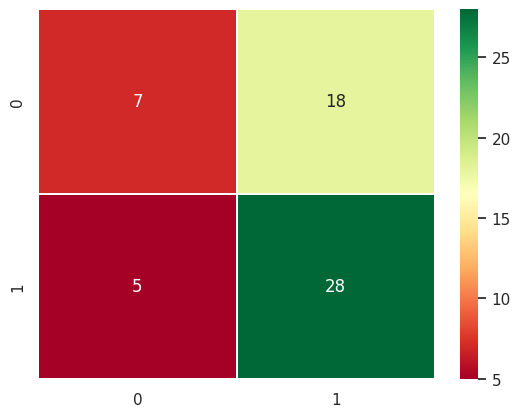

In [45]:
y_pred = grid.predict(X)

# from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
cm_LR=confusion_matrix(Y, y_pred)
print(cm_LR)
# from sklearn.metrics import classification_report
print(classification_report(Y, y_pred))

import seaborn as sns
sns.heatmap(cm_LR, annot=True,fmt="",cmap='RdYlGn',linewidths=0.30)

## LR dengan Polarity

In [46]:
#Load dataset
data = class_polarity

#Membuat Variabel X dan Y
X_p = data[data.columns[1:]]
Y_p = data['Label']

In [47]:
# Import logistic regression classifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }

grid = GridSearchCV(LogisticRegression(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_p, Y_p)

# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

Streaming output truncated to the last 5000 lines.
[CV 4/5] END C=0.08858667904100823, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.08858667904100823, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.08858667904100823, max_iter=2500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.08858667904100823, max_iter=2500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.08858667904100823, max_iter=2500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.08858667904100823, max_iter=2500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.08858667904100823, max_iter=2500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.08858667904100823, max_iter=2500, penalty=l1, solver=liblinear;, score=0.417 total time=   0.0s
[CV 2/5] END C=0.08858667904100823, max_iter=2500, penalty=l1, solv

[[12 13]
 [ 5 28]]
              precision    recall  f1-score   support

        Naik       0.71      0.48      0.57        25
       Turun       0.68      0.85      0.76        33

    accuracy                           0.69        58
   macro avg       0.69      0.66      0.66        58
weighted avg       0.69      0.69      0.68        58



<Axes: >

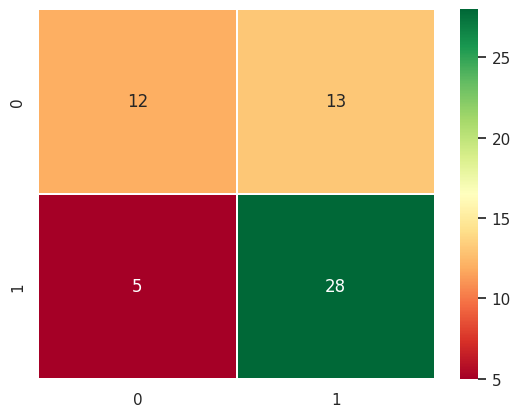

In [48]:
y_pred_p = grid.predict(X_p)

# from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
cm_LR=confusion_matrix(Y_p, y_pred_p)
print(cm_LR)
# from sklearn.metrics import classification_report
print(classification_report(Y_p, y_pred_p))

import seaborn as sns
sns.heatmap(cm_LR, annot=True,fmt="",cmap='RdYlGn',linewidths=0.30)

# Linear Discriminant Analysis (LDA)

## Tanpa Polarity

In [49]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix

data = class_tanpa_polarity

#Membuat Variabel X dan Y
X_LDA = data[data.columns[1:4]]
Y_LDA = data['Label']

lda = LinearDiscriminantAnalysis()
model = lda.fit(X_LDA,Y_LDA)
pred = model.predict(X_LDA)

#print(confusion_matrix(Y_LDA, pred))
print(classification_report(Y_LDA, pred))

              precision    recall  f1-score   support

        Naik       0.54      0.28      0.37        25
       Turun       0.60      0.82      0.69        33

    accuracy                           0.59        58
   macro avg       0.57      0.55      0.53        58
weighted avg       0.57      0.59      0.55        58



<Axes: >

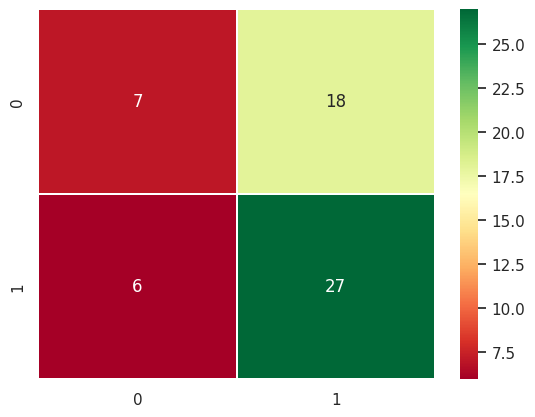

In [50]:
import seaborn as sns
cm_LDA=confusion_matrix(Y_LDA, pred)
sns.heatmap(cm_LDA, annot=True,fmt="",cmap='RdYlGn',linewidths=0.30)

## LDA dengan Polarity

In [51]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

data = class_polarity

#Membuat Variabel X dan Y
X_LDA_p = data[data.columns[1:]]
Y_LDA_p = data['Label']

lda =  LinearDiscriminantAnalysis()
model = lda.fit(X_LDA_p,Y_LDA_p)
pred_p = model.predict(X_LDA_p)

print(confusion_matrix(Y_LDA_p, pred_p))
print(classification_report(Y_LDA_p, pred_p))

[[14 11]
 [ 6 27]]
              precision    recall  f1-score   support

        Naik       0.70      0.56      0.62        25
       Turun       0.71      0.82      0.76        33

    accuracy                           0.71        58
   macro avg       0.71      0.69      0.69        58
weighted avg       0.71      0.71      0.70        58



<Axes: >

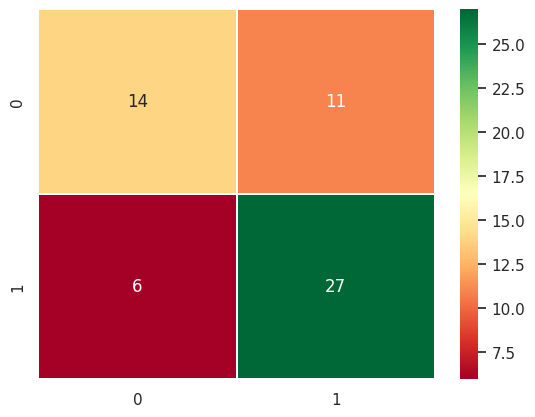

In [52]:
import seaborn as sns
cm_LDA=confusion_matrix(Y_LDA_p, pred_p)
sns.heatmap(cm_LDA, annot=True,fmt="",cmap='RdYlGn',linewidths=0.30)

# K-Nearest Neigbour

## Tanpa Polarity

In [53]:
#import package
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [54]:
data = class_tanpa_polarity

#menentukan variabel independen
x = data.drop(['Label'],axis = 1)

#menentukan variabel dependen
y = data['Label']

n_terbaik = 0
maks_akurasi = 0

#menentukan n terbaik KNN

for i in range(2,10):
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(x,y)

  y_pred = knn.predict(x)

  akurasi = accuracy_score(y, y_pred)

  print(f'Akurasi for n={i}: {akurasi}')
  if akurasi > maks_akurasi:
        maks_akurasi = akurasi
        n_terbaik = i

# Cetak nilai n_terbaik dan maks_akurasi setelah loop selesai
print(f'Nilai n terbaik: {n_terbaik}, Maksimum Akurasi: {maks_akurasi:.4f}')

Akurasi for n=2: 0.7413793103448276
Akurasi for n=3: 0.7586206896551724
Akurasi for n=4: 0.6724137931034483
Akurasi for n=5: 0.7241379310344828
Akurasi for n=6: 0.6724137931034483
Akurasi for n=7: 0.7068965517241379
Akurasi for n=8: 0.6551724137931034
Akurasi for n=9: 0.7241379310344828
Nilai n terbaik: 3, Maksimum Akurasi: 0.7586


In [55]:
#KNN untuk n terbaik
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x,y)

y_pred = knn.predict(x)

cm = confusion_matrix(y, y_pred)

print('confussion matrix:')
print(confusion_matrix(y, y_pred))

print('classification report:')
print(classification_report(y, y_pred))

print('nilai akurasi:')
print(accuracy_score(y, y_pred))

confussion matrix:
[[16  9]
 [ 5 28]]
classification report:
              precision    recall  f1-score   support

        Naik       0.76      0.64      0.70        25
       Turun       0.76      0.85      0.80        33

    accuracy                           0.76        58
   macro avg       0.76      0.74      0.75        58
weighted avg       0.76      0.76      0.76        58

nilai akurasi:
0.7586206896551724


<Axes: >

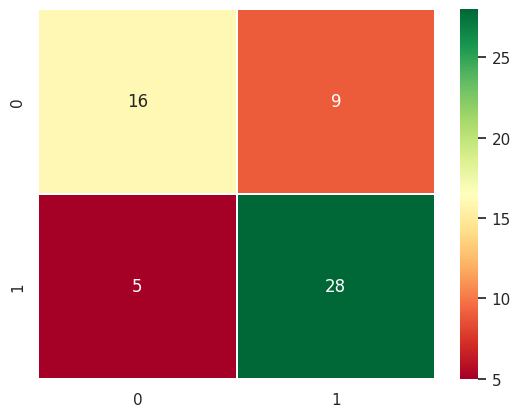

In [56]:
import seaborn as sns
sns.heatmap(cm, annot=True,fmt="",cmap='RdYlGn',linewidths=0.30)

## KNN dengan Polarity

In [57]:
data = class_polarity

#menentukan variabel independen
x = data.drop(['Label'],axis = 1)

#menentukan variabel dependen
y = data['Label']

n_terbaik = 0
maks_akurasi = 0

#menentukan n terbaik KNN

for i in range(2,10):
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(x,y)

  y_pred = knn.predict(x)

  akurasi = accuracy_score(y, y_pred)

  print(f'Akurasi for n={i}: {akurasi}')
  if akurasi > maks_akurasi:
        maks_akurasi = akurasi
        n_terbaik = i

# Cetak nilai n_terbaik dan maks_akurasi setelah loop selesai
print(f'Nilai n terbaik: {n_terbaik}, Maksimum Akurasi: {maks_akurasi:.4f}')

Akurasi for n=2: 0.8103448275862069
Akurasi for n=3: 0.7931034482758621
Akurasi for n=4: 0.7758620689655172
Akurasi for n=5: 0.7413793103448276
Akurasi for n=6: 0.6724137931034483
Akurasi for n=7: 0.7241379310344828
Akurasi for n=8: 0.6551724137931034
Akurasi for n=9: 0.7241379310344828
Nilai n terbaik: 2, Maksimum Akurasi: 0.8103


In [58]:
#KNN untuk n terbaik
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(x,y)

y_pred = knn.predict(x)

cm = confusion_matrix(y, y_pred)

print('confussion matrix:')
print(confusion_matrix(y, y_pred))

print('classification report:')
print(classification_report(y, y_pred))

print('nilai akurasi:')
print(accuracy_score(y, y_pred))

confussion matrix:
[[25  0]
 [11 22]]
classification report:
              precision    recall  f1-score   support

        Naik       0.69      1.00      0.82        25
       Turun       1.00      0.67      0.80        33

    accuracy                           0.81        58
   macro avg       0.85      0.83      0.81        58
weighted avg       0.87      0.81      0.81        58

nilai akurasi:
0.8103448275862069


<Axes: >

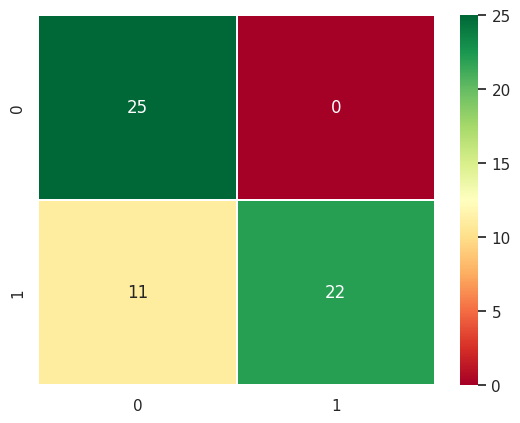

In [59]:
import seaborn as sns
sns.heatmap(cm, annot=True,fmt="",cmap='RdYlGn',linewidths=0.30)

# SVM

##SVM (Tanpa Polaritas)

In [60]:
import pandas as pd
import numpy as np

data = class_tanpa_polarity

#Membuat Variabel X dan Y
X_SVM = data[data.columns[1:4]]
Y_SVM = data['Label']

In [61]:
# Import SVM classifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_SVM, Y_SVM)

# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.583 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.583 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.583 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.545 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.545 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.583 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.583 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.583 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.545 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.545 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.583 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[[12 13]
 [ 5 28]]
              precision    recall  f1-score   support

        Naik       0.71      0.48      0.57        25
       Turun       0.68      0.85      0.76        33

    accuracy                           0.69        58
   macro avg       0.69      0.66      0.66        58
weighted avg       0.69      0.69      0.68        58



<Axes: >

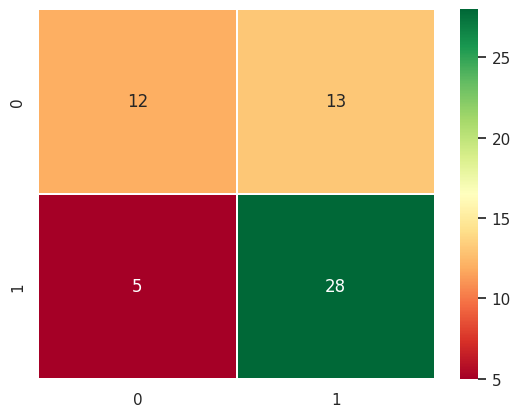

In [62]:
y_pred_SVM = grid.predict(X_SVM)

# from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
cm_SVM=confusion_matrix(Y_SVM, y_pred_SVM)
print(cm_SVM)
# from sklearn.metrics import classification_report
print(classification_report(Y_SVM, y_pred_SVM))

import seaborn as sns
sns.heatmap(cm_SVM, annot=True,fmt="",cmap='RdYlGn',linewidths=0.30)

##SVM (Dengan Polarity)

In [63]:
import pandas as pd
import numpy as np

datap = class_polarity

#Membuat Variabel X dan Y
X_SVM_p = datap[datap.columns[1:7]]
Y_SVM_p = datap['Label']

In [64]:
# Import SVM classifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_SVM_p, Y_SVM_p)

# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.583 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.583 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.583 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.545 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.545 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.583 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.583 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.583 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.545 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.545 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.583 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[[21  4]
 [ 3 30]]
              precision    recall  f1-score   support

        Naik       0.88      0.84      0.86        25
       Turun       0.88      0.91      0.90        33

    accuracy                           0.88        58
   macro avg       0.88      0.87      0.88        58
weighted avg       0.88      0.88      0.88        58



<Axes: >

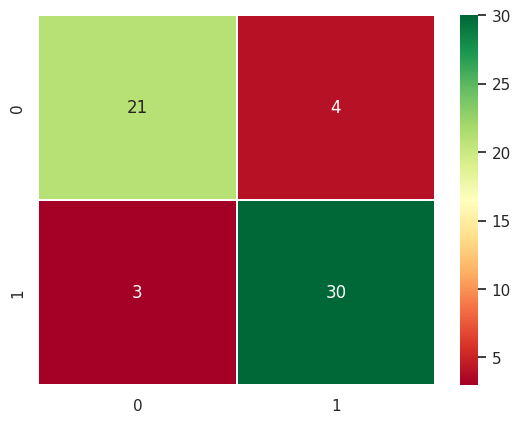

In [65]:
y_pred_SVM_p = grid.predict(X_SVM_p)

# from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
cm_SVM_p=confusion_matrix(Y_SVM_p, y_pred_SVM_p)
print(cm_SVM_p)
# from sklearn.metrics import classification_report
print(classification_report(Y_SVM_p, y_pred_SVM_p))

import seaborn as sns
sns.heatmap(cm_SVM_p, annot=True,fmt="",cmap='RdYlGn',linewidths=0.30)

Dapat dilihat bahwa dari keempat model klasifikasi, **Polarity akan menaikkan akurasi model jika dibandingkan dengan data tanpa polaritas. Artinya analisis sentimen dapat membantu untuk menaikkan akurasi model biasa untuk mengklasifikasian Naik/Turunnya harga saham**.